<a href="https://colab.research.google.com/github/ApoorvaNagarajan/Image-Filter-Kernels/blob/master/assignment2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [1]:
# https://keras.io/
# import keras which is a deep learning python library. Keras is capable of
# running on top of most of the opensource deep learning frameworks and makes 
# our life very easy
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# numpy is scientific computing python package. This also provides us 
# multi-dimensional array functionality. We will need this to represent 
# our data and for some computation
import numpy as np

# importing keras core data structure packages needed to build our network

# A model is a way to organize layers. Sequential model means a linear stack of layers
from keras.models import Sequential
# Import Flatten and Convolution2D layers which we will use to build our network
from keras.layers import Flatten
from keras.layers import Convolution2D
# Import keras np_utils which provide some utilities for the numpy objects 
# that people generally use while building networks
from keras.utils import np_utils

# MNIST database is a large database of 10 hand written digits (0 to 9). 
# It provides both testing and training images. We will use mnist dataset for
# training our network
from keras.datasets import mnist

In [3]:
# load_data function downloads the MNIST dataset and splits it into test and train.
# It returns 2 tuples containing test and train data
# X_train is an array of images used for training
# Y_train is an array of digit labels indicating the digits from 0 to 9 for the images in X_train
# X_test is an array of images used for testing
# Y_test is an array of digit labels indicating the digits from 0 to 9 for the images in X_test. This is used to validate our network output
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


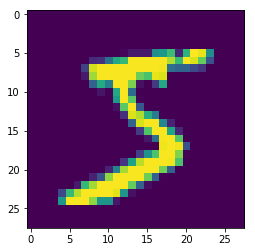

In [4]:
# print the dimensions of the X_train array. From the output looks like there
# are 60000 images of size 28x28
print (X_train.shape)

# import pyton plot libraries which help us visualize data
from matplotlib import pyplot as plt
%matplotlib inline

# Visualize 1st image of the training set
plt.imshow(X_train[0])

In [0]:
# X_train and X_test are reshaped from 3 dimensions to 4 dimensions
# 1st dim : num images
# 2nd and 3rd dim : Width and height of eaach of the images
# 4th dim : number of channels in each of the image. We set this to 1 as the
#           our dataset has only gray images
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# We are normalizing our test and train images. This will make values of all
# the pixels lie between 0 to 1. Normalization helps to maintain accuracy 
# even after a huge number of multiplications involved in multiple convolutions
# First converting the datatype to float to support storing fractional values
# resulting from normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# print the first 10 traing image labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# 1-dimensional class arrays store only the class 
# class matricies store the probability of the image for each of the classes
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# print the class matrix for easy understanding of the class matrix
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# This code defines our network

# import libraries for Activation and MaxPooling2D layers from keras
from keras.layers import Activation, MaxPooling2D

# Our model is a sequential model. We are going to stack layers one after the other
model = Sequential() 
# 1st layer : convolution layer, input ch 1, 32 3x3x1 kernels, receptive field 3x3, output 26x26x32
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# 2nd layer : convolution layer, input ch 32, 64 3x3x32 kernels, receptive field 5x5, output 24x24x64
model.add(Convolution2D(64, 3, 3, activation='relu'))
# 3rd layer : convolution layer, input ch 64, 128 3x3x64 kernels, receptive field 7x7, output 22x22x128
model.add(Convolution2D(128, 3, 3, activation='relu'))

# 4th layer : max pooling layer, input ch 128, 2x2 max pooling operation, receptive field 14x14, output 11x11x128
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5th layer : convolution layer, input ch 128, 256 3x3x128 kernels, receptive field 16x16, output 9x9x256
model.add(Convolution2D(256, 3, 3, activation='relu'))
# 6th layer : convolution layer, input ch 256, 512 3x3x256 kernels, receptive field 18x18, output 7x7x512
model.add(Convolution2D(512, 3, 3, activation='relu'))
# 7th layer : convolution layer, input ch 512, 1024 3x3x512 kernels, receptive field 20x20, output 5x5x1024
model.add(Convolution2D(1024, 3, 3, activation='relu'))
# 8th layer : convolution layer, input ch 1024, 2048 3x3x1024 kernels, receptive field 22x22, output 3x3x2048
model.add(Convolution2D(2048, 3, 3, activation='relu'))
# 9th layer : convolution layer, input ch 2048, 10 3x3x2048 kernels, receptive field 24x24, output 1x1x10
model.add(Convolution2D(10, 3, 3, activation='relu'))

model.add(Flatten())

# softmax layer is added just before the output layer. This converts the network
# analysis to probabilities for each of the image classes
model.add(Activation('softmax'))

# prints the summary of the network just built
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
# Compile the network that we have put together. We are definig the 
# loss as categorical_crossentropy
# optimization method as adam (adaptive estimates of lower-order moments)
# ADAM is a first order gradient descent based optimization strategy
# Metric is used to evaluate the performace of the model. We are using accuracy as the metric
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# Training function. This function filts a predictor to the training
# data provided. To do that, we are configuring a batch size of 32 and number of epoch to 10.
# So this network will be run 10 times for backpropagation to correct the weights
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 119s 2ms/step - loss: 1.4419 - acc: 0.4026
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.3873 - acc: 0.4110
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.3738 - acc: 0.4131
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.3707 - acc: 0.4130
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.3679 - acc: 0.4137
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.3685 - acc: 0.4134
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.3672 - acc: 0.4129
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.3692 - acc: 0.4128
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.3712 - acc: 0.4129
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.3661 - a

In [0]:
# Evaluate the fitted predictor and compare with the ground truth to give us a metric score
# Returns 2 values
# 1st loss values
# 2nd metric value. we have configured metric to accuracy. So we will get back accuracy
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
# print the returned score. Outut indicates that the network is very bad and inaccurate
print(score)

[1.3695639165878295, 0.4096]


In [0]:
# Generate the predicted output for the test images
y_pred = model.predict(X_test)

In [16]:
# Just print first 9 predicted values and ground truth values to visualize how
# inaccurate the network is
print(y_pred[:9])
print(y_test[:9])

[[1.9179991e-09 1.9179991e-09 1.9179991e-09 1.9179991e-09 1.9179991e-09
  1.9179991e-09 1.9179991e-09 1.0000000e+00 1.9179991e-09 1.9179991e-09]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.1480945e-11 1.0000000e+00 1.1480945e-11 1.1480945e-11 1.1480945e-11
  1.1480945e-11 1.1480945e-11 1.1480945e-11 1.1480945e-11 1.1480945e-11]
 [1.0000000e+00 5.0974786e-15 5.0974786e-15 5.0974786e-15 5.0974786e-15
  5.0974786e-15 5.0974786e-15 5.0974786e-15 5.0974786e-15 5.0974786e-15]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [3.5240612e-13 1.0000000e+00 3.5240612e-13 3.5240612e-13 3.5240612e-13
  3.5240612e-13 3.5240612e-13 3.5240612e-13 3.5240612e-13 3.5240612e-13]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 

**Issue with the above network**

The problem with this network is, we are not filtering out unnecessary data after the max pooling layer (4th layer). At the 9th layer we have accumulated too much unnecessary information or features (2048 channels). From this 2048 channels, we try to collate to 10 channels which should correspond to our ten classes. This makes the network very inaccurate. We should rather try and reduce channels towards the end of the network

Receptive field of the network seems to be ok as the network has seen almost entire image. 

In the below cell I have corrected the code to make the model better

In [24]:
# Our model is a sequential model. We are going to stack layers one after the other
model_new = Sequential() 
# 1st layer : convolution layer, input ch 1, 32 3x3x1 kernels, receptive field 3x3, output 26x26x32
model_new.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# 2nd layer : convolution layer, input ch 32, 64 3x3x32 kernels, receptive field 5x5, output 24x24x64
model_new.add(Convolution2D(64, 3, 3, activation='relu'))
# 3rd layer : convolution layer, input ch 64, 128 3x3x64 kernels, receptive field 7x7, output 22x22x128
model_new.add(Convolution2D(128, 3, 3, activation='relu'))

# 4th layer : max pooling layer, input ch 128, 2x2 max pooling operation, receptive field 14x14, output 11x11x128
model_new.add(MaxPooling2D(pool_size=(2, 2)))

# 5th layer : convolution layer, input ch 128, 32 3x3x128 kernels, receptive field 16x16, output 9x9x32
model_new.add(Convolution2D(256, 3, 3, activation='relu'))
# 6th layer : convolution layer, input ch 32, 64 3x3x32 kernels, receptive field 18x18, output 7x7x64
model_new.add(Convolution2D(128, 3, 3, activation='relu'))
# 7th layer : convolution layer, input ch 64, 128 3x3x64 kernels, receptive field 20x20, output 5x5x128
model_new.add(Convolution2D(64, 3, 3, activation='relu'))
# 8th layer : convolution layer, input ch 128, 64 3x3x128 kernels, receptive field 22x22, output 3x3x64
model_new.add(Convolution2D(32, 3, 3, activation='relu'))
# 9th layer : convolution layer, input ch 64, 10 3x3x2048 kernels, receptive field 24x24, output 1x1x10
model_new.add(Convolution2D(10, 3, 3, activation='relu'))

model_new.add(Flatten())

# softmax layer is added just before the output layer. This converts the network
# analysis to probabilities for each of the image classes
model_new.add(Activation('softmax'))

# prints the summary of the network just built
model_new.summary()


# Compile the network that we have put together. We are definig the 
# loss as categorical_crossentropy
# optimization method as adam (adaptive estimates of lower-order moments)
# ADAM is a first order gradient descent based optimization strategy
# Metric is used to evaluate the performace of the model. We are using accuracy as the metric
model_new.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Run the model just compiled. This function filts a predictor to the training
# data provided
model_new.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

# Evaluate the fitted predictor and compare with the ground truth to give us a metric score
# Returns 2 values
# 1st loss values
# 2nd metric value. we have configured metric to accuracy. So we will get back accuracy
score = model_new.evaluate(X_test, Y_test, verbose=0)

# print the returned score. Outut indicates that the network is very bad and inaccurate
print(score)

# Generate the predicted output for the test images
y_pred = model_new.predict(X_test)

# Just print first 9 predicted values and ground truth values to visualize how
# inaccurate the network is
print(y_pred[:9])
print(y_test[:9])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  from ipykernel import kernelapp 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 7, 7, 128)         295040    
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 5, 5, 64)          73792     
__________